In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [12, 6]

In [5]:
data_path = "../data/origineel"

if not Path(data_path).is_dir():
    raise Warning("Data path does not exist")


In [6]:
# Lijst van .csv-bestanden
data_file_paths = [p for p in Path(data_path).iterdir() if p.suffix==".csv"]

In [7]:
# Lees de drie bestanden van het circuit as pandas DataFrame
cableconfig = pd.read_csv(data_file_paths[0], sep=";")
partialdischarges = pd.read_csv(data_file_paths[1], sep=";")
warning = pd.read_csv(data_file_paths[2], sep=";")

## PD plotjes

In [8]:
partialdischarges

,Date/time (UTC),Location in meters (m),Charge (picocoulomb)
0,2016-08-03 09:00:00,NaN,NaN
1,2016-08-03 09:01:00,NaN,NaN
2,2016-08-03 09:02:00,NaN,NaN
3,2016-08-03 09:04:00,NaN,NaN
4,2016-08-03 09:05:00,NaN,NaN
5,2016-08-03 09:06:00,NaN,NaN
6,2016-08-03 09:07:00,NaN,NaN
7,2016-08-03 09:08:00,NaN,NaN
8,2016-08-03 09:09:00,NaN,NaN
9,2016-08-03 09:10:00,NaN,NaN


In [9]:
# Namen van de kolommen
time_col, location_col, charge_col = partialdischarges.columns

# Check that each row either has location and charge undefinied, or both defined:
for i in np.arange(len(partialdischarges))[np.isnan(partialdischarges[location_col]) != np.isnan(partialdischarges[charge_col])]:
    raise Warning(f"Row {i} has missing values")

# Lijst met bools die aangeeft of er op dat tijdstip een PD was
pd_occured = ~np.isnan(partialdischarges[location_col])

# De drie kolommen; alleen op tijdstippen met PD
locations = partialdischarges[location_col][pd_occured]
charges = partialdischarges[charge_col][pd_occured]
times = partialdischarges[time_col][pd_occured].apply(datetime.datetime.fromisoformat)

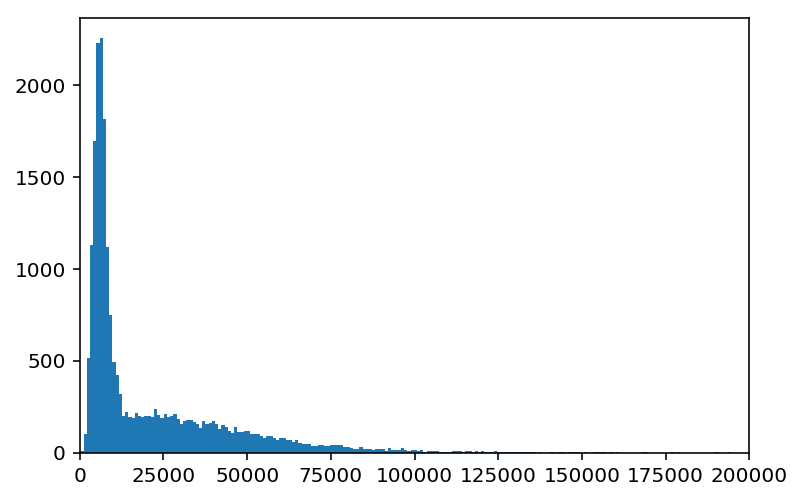

In [10]:
plt.hist(charges,bins=500)
plt.xlim(0,2e5)
plt.show()

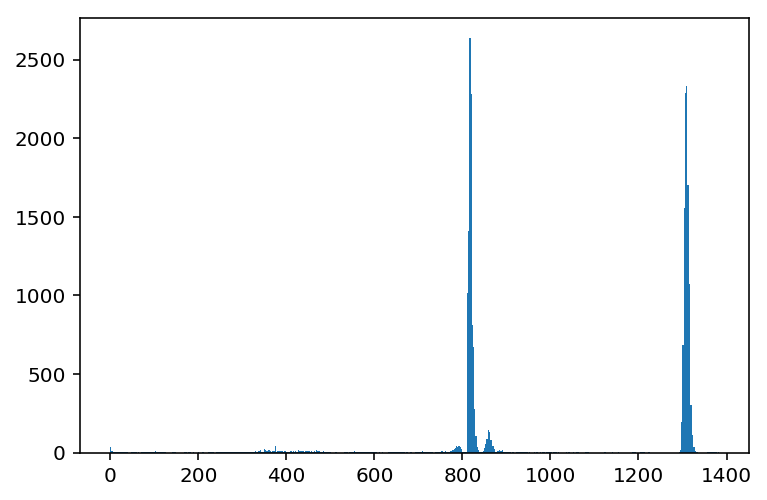

In [11]:
plt.hist(locations,bins=500)
#plt.xlim(0,2e5)
plt.show()

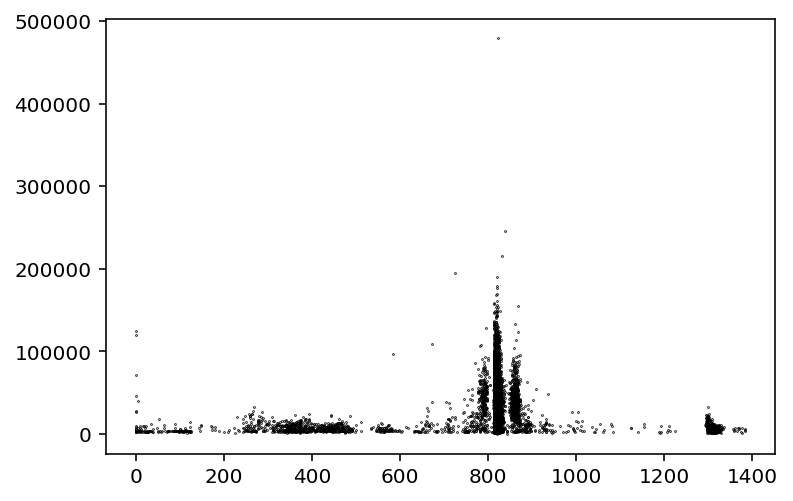

In [12]:
plt.scatter(x=locations, y=charges, s=.1, c='.0')
plt.show()

c:\users\matth\desktop\scg-analyse\venv\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


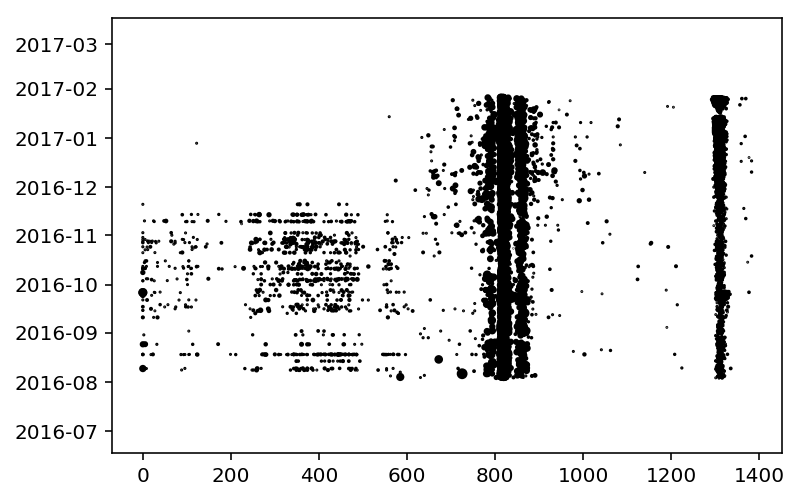

In [13]:
plt.scatter(x=locations, y=times, s=charges/1e4, c='.0')
plt.show()

In [14]:
warning

,Location in meters (m),SCG warning level (1 to 3 or Noise),Start Date/time (UTC),End Date/time (UTC)
0,818,3,2016-08-11 14:55:18,2016-08-31 23:59:00
1,818,N,2016-08-11 14:55:18,2017-02-28 00:00:00
2,1309,1,2017-01-26 15:13:37,2017-02-07 09:14:41
3,1309,N,2016-12-11 21:14:22,2017-01-26 15:13:37
4,1313,3,2016-09-26 12:39:46,2016-11-28 20:45:44


AttributeError: 'Series' object has no attribute 'remove'

In [16]:
for p in locations:
    print(p)

1308.77057055824
1316.17311194272
1301.36802917376
1314.69260366582
816.713965934576
819.674982488367
815.2334576576801
818.194474211472
815.2334576576801
815.2334576576801
813.03
816.713965934576
816.713965934576
813.03
819.674982488367
802.695121723979
818.194474211472
821.155490765263
813.03
813.03
827.077523872845
630.650541520722
824.116507319054
864.090230795235
1313.21209538892
841.882606641801
1310.25107883513
584.754784936959
816.713965934576
821.155490765263
822.635999042158
818.194474211472
818.194474211472
813.03
816.713965934576
818.194474211472
819.674982488367
816.713965934576
818.194474211472
818.194474211472
816.713965934576
816.713965934576
813.03
821.155490765263
818.194474211472
818.194474211472
813.03
818.194474211472
818.194474211472
813.03
815.2334576576801
816.713965934576
819.674982488367
815.2334576576801
816.713965934576
821.155490765263
818.194474211472
813.03
818.194474211472
815.2334576576801
824.116507319054
813.03
818.194474211472
816.713965934576
822.63

781.968005847441
795.292580339501
798.253596893292
819.674982488367
825.59701559595
816.713965934576
813.03
818.194474211472
822.635999042158
813.03
824.116507319054
819.674982488367
815.2334576576801
819.674982488367
818.194474211472
818.194474211472
813.03
818.194474211472
816.713965934576
818.194474211472
818.194474211472
819.674982488367
819.674982488367
813.03
816.713965934576
818.194474211472
822.635999042158
815.2334576576801
827.077523872845
813.03
815.2334576576801
815.2334576576801
821.155490765263
818.194474211472
824.116507319054
818.194474211472
816.713965934576
819.674982488367
819.674982488367
821.155490765263
813.03
819.674982488367
816.713965934576
816.713965934576
818.194474211472
822.635999042158
816.713965934576
819.674982488367
821.155490765263
815.2334576576801
830.038540426636
1308.77057055824
1313.21209538892
1313.21209538892
1313.21209538892
1311.73158711203
815.2334576576801
822.635999042158
815.2334576576801
813.03
821.155490765263
815.2334576576801
821.15549

1313.21209538892
815.2334576576801
816.713965934576
816.713965934576
816.713965934576
872.973280456609
819.674982488367
822.635999042158
822.635999042158
822.635999042158
825.59701559595
818.194474211472
818.194474211472
821.155490765263
822.635999042158
819.674982488367
821.155490765263
813.03
821.155490765263
819.674982488367
815.2334576576801
815.2334576576801
816.713965934576
819.674982488367
821.155490765263
827.077523872845
821.155490765263
825.59701559595
816.713965934576
818.194474211472
816.713965934576
816.713965934576
819.674982488367
818.194474211472
819.674982488367
821.155490765263
821.155490765263
816.713965934576
818.194474211472
813.03
816.713965934576
818.194474211472
813.03
813.03
819.674982488367
818.194474211472
818.194474211472
818.194474211472
819.674982488367
813.03
818.194474211472
813.03
813.03
1317.65362021961
1314.69260366582
1305.80955400445
1314.69260366582
1311.73158711203
1319.13412849651
1319.13412849651
1310.25107883513
1313.21209538892
1310.2510788351

861.140000096333
819.683176034777
824.1249786128011
1305.82719096032
1317.67199783505
1316.19139697571
815.241373456753
816.721974316094
818.202575175436
822.6443777534599
819.683176034777
865.581802674357
815.241373456753
824.1249786128011
824.1249786128011
818.202575175436
822.6443777534599
818.202575175436
818.202575175436
819.683176034777
821.1637768941182
813.03
816.721974316094
822.6443777534599
815.241373456753
816.721974316094
1310.26899353834
815.241373456753
821.1637768941182
816.721974316094
819.683176034777
819.683176034777
816.721974316094
818.202575175436
831.5279829095068
821.1637768941182
822.6443777534599
813.03
816.721974316094
1311.74959439768
1316.19139697571
1308.788392679
1313.23019525702
1310.26899353834
819.683176034777
821.1637768941182
822.6443777534599
816.721974316094
818.202575175436
853.736995799627
865.581802674357
816.721974316094
827.0861803314841
815.241373456753
813.03
816.721974316094
815.241373456753
821.1637768941182
821.1637768941182
819.683176034

652.876543289593
104.382360566633
1320.63319955373
450.034225559834
373.53
1310.26899353834
1308.788392679
1316.19139697571
1313.23019525702
1317.67199783505
1319.15259869439
1313.23019525702
1314.71079611636
1320.63319955373
1311.74959439768
1320.63319955373
813.03
813.03
818.202575175436
818.202575175436
821.1637768941182
813.03
819.683176034777
818.202575175436
821.1637768941182
818.202575175436
819.683176034777
813.03
818.202575175436
822.6443777534599
830.047382050166
821.1637768941182
824.1249786128011
818.202575175436
824.1249786128011
1308.788392679
1308.788392679
1305.82719096032
1307.30779181966
1308.788392679
1316.19139697571
1320.63319955373
1313.23019525702
1304.3465901009802
1320.63319955373
1313.23019525702
1316.19139697571
1319.15259869439
1326.5556029911
1313.23019525702
1316.19139697571
1317.67199783505
1304.3465901009802
1322.1138004130698
1311.74959439768
1314.71079611636
1323.5944012724099
1316.19139697571
1320.63319955373
1319.15259869439
1326.5556029911
1304.3465

1319.15259869439
1320.63319955373
1330.9974055691198
1308.788392679
1320.63319955373
1311.74959439768
1307.30779181966
1316.19139697571
1310.26899353834
1313.23019525702
1319.15259869439
1317.67199783505
997.1903474506488
816.721974316094
819.683176034777
819.683176034777
824.1249786128011
819.683176034777
1322.1138004130698
816.721974316094
818.202575175436
818.202575175436
822.6443777534599
813.03
859.659399236992
819.683176034777
1317.67199783505
818.202575175436
824.1249786128011
858.1787983776511
786.438092362591
833.008583768849
864.101201815016
1311.74959439768
1308.788392679
1326.5556029911
1317.67199783505
1311.74959439768
1322.1138004130698
1308.788392679
1310.26899353834
816.721974316094
821.1637768941182
822.6443777534599
818.202575175436
822.6443777534599
864.101201815016
813.03
818.202575175436
824.1249786128011
821.1637768941182
818.202575175436
819.683176034777
815.241373456753
824.1249786128011
821.1637768941182
822.6443777534599
813.03
818.202575175436
819.68317603477

481.14250245613295
0.0
448.565107857237
0.0
786.496646972068
824.142345701136
819.699973710378
819.699973710378
825.623136364722
822.6615550375501
813.03
819.699973710378
818.2191830467909
813.03
815.257601719619
813.03
815.257601719619
821.1807643739639
821.1807643739639
824.142345701136
815.257601719619
816.738392383205
816.738392383205
818.2191830467909
818.2191830467909
1307.34413933248
819.699973710378
819.699973710378
821.1807643739639
816.738392383205
815.257601719619
824.142345701136
818.2191830467909
819.699973710378
821.1807643739639
824.142345701136
818.2191830467909
818.2191830467909
363.53410789341
862.642902954377
356.13015457547897
373.53
439.68036387572
815.257601719619
427.83403856703
228.782157507066
369.457270547755
0.0
110.318904420171
314.668015995066
338.360666612445
564.06677961696
255.436389451618
73.299137830516
487.065665110478
344.28382926679
5.18276730555108
467.81538648385697
746.732393100478
578.874686252822
360.572526566238
92.5494164571365
0.0
357.610945

816.738392383205
818.2191830467909
819.699973710378
815.257601719619
821.1807643739639
813.03
816.738392383205
821.1807643739639
828.584717691895
865.60448428155
825.623136364722
825.623136364722
813.776811056033
867.085274945136
867.085274945136
818.2191830467909
818.2191830467909
827.103927028309
828.584717691895
818.2191830467909
819.699973710378
853.75815897286
871.527646935894
1310.30572065966
821.1807643739639
1311.7865113232401
1310.30572065966
816.738392383205
821.1807643739639
818.2191830467909
819.699973710378
821.1807643739639
813.03
816.738392383205
822.6615550375501
819.699973710378
816.738392383205
815.257601719619
815.257601719619
816.738392383205
813.03
818.2191830467909
815.257601719619
818.2191830467909
818.2191830467909
819.699973710378
1305.8633486689
1311.7865113232401
1299.94018601455
335.399085285272
370.938061211341
374.525574677927
1310.30572065966
490.02724643765
335.399085285272
756.8808337003439
487.065665110478
405.622178613237
70.3375565033436
861.16211229

386.375175017316
323.591440745291
373.53
481.157107322995
342.844020744882
116.25596382661699
265.83370074651697
354.691762283092
461.904527323404
97.0033838270261
451.53775347747
222.885637670506
470.790333477061
261.390797669689
411.551625786012
421.918399631945
350.248859206263
567.053233475017
461.904527323404
111.813060749788
311.743699207081
341.363053052606
387.856142709592
25.9169345977665
464.86646270795603
369.501439205854
381.932271940487
99.9653192115786
813.03
862.6637038253909
822.677576133932
448.5758180929181
363.57756843674895
427.84227040105003
336.920149975777
720.294356184664
350.248859206263
550.762588859978
188.823380748153
1053.5494737509
1314.78287878794
373.53
368.02047151357806
251.024023823755
353.21079459081596
467.828398092509
370.9824068981311
325.072408437567
299.895957668871
439.69001193926005
350.248859206263
329.51531151439605
1301.4541695574499
473.75226886161397
52.5743530587389
48.1314499819102
288.048216130661
24.435966905490304
555.205491936807
46

1313.30191109566
1310.33997571111
1314.78287878794
1314.78287878794
749.527068015974
889.0096424371941
813.03
815.272737672551
828.601446903037
792.475131091985
821.196608441656
952.8436706761161
865.625639209943
816.7537053648268
821.196608441656
813.03
821.196608441656
822.677576133932
813.03
813.03
819.71564074938
819.71564074938
831.56338228759
816.7537053648268
818.234673057103
819.71564074938
824.1585438262082
822.677576133932
1013.56334605944
816.7537053648268
819.71564074938
819.71564074938
818.234673057103
815.272737672551
819.71564074938
822.677576133932
821.196608441656
813.03
821.196608441656
813.7917699802748
816.7537053648268
821.196608441656
819.71564074938
819.71564074938
815.272737672551
819.71564074938
815.272737672551
818.234673057103
819.71564074938
815.272737672551
819.71564074938
815.272737672551
821.196608441656
819.71564074938
813.7917699802748
813.7917699802748
816.7537053648268
827.120479210761
815.272737672551
821.196608441656
815.272737672551
819.71564074938

1308.86757185229
821.2005900681081
815.276541349217
821.2005900681081
815.276541349217
818.238565708662
822.6816022478308
816.7575535289391
858.2258945611778
818.238565708662
813.795529169494
815.276541349217
821.2005900681081
813.795529169494
815.276541349217
813.795529169494
815.276541349217
818.238565708662
788.045996879855
824.162614427554
796.932069958192
810.261179575698
821.2005900681081
821.2005900681081
777.6789116217958
899.1958372118311
818.238565708662
891.0502702233549
1308.86757185229
1313.31060839145
1313.31060839145
1307.38655967256
1302.94352313339
1304.42453531312
1313.31060839145
1310.34858403201
1314.79162057118
1313.31060839145
1305.90554749284
1310.34858403201
1308.86757185229
1308.86757185229
1305.90554749284
1307.38655967256
1308.86757185229
1305.90554749284
1307.38655967256
1311.82959621173
1304.42453531312
1316.2726327509
1311.82959621173
1307.38655967256
1311.82959621173
1314.79162057118
1316.2726327509
1310.34858403201
1316.2726327509
1319.23465711035
1307.3

1305.90554749284
1308.86757185229
1308.86757185229
1314.79162057118
1308.86757185229
1310.34858403201
1307.38655967256
1308.86757185229
1311.82959621173
1310.34858403201
1307.38655967256
1311.82959621173
1035.78900554894
818.238565708662
819.7195778883852
1311.82959621173
813.03
818.238565708662
815.276541349217
813.03
813.03
815.276541349217
883.922899108439
813.03
751.020692386785
813.795529169494
708.083820199978
816.7575535289391
824.162614427554
799.894094317638
813.03
825.643626607276
856.744882381456
816.7575535289391
815.276541349217
818.238565708662
865.6309554597922
1311.82959621173
1304.42453531312
1314.79162057118
1305.90554749284
1307.38655967256
1308.86757185229
1314.79162057118
1308.86757185229
1316.2726327509
1310.34858403201
1308.86757185229
1305.90554749284
1305.90554749284
1311.82959621173
1310.34858403201
1310.34858403201
1310.34858403201
1311.82959621173
1310.34858403201
1310.34858403201
1310.34858403201
1308.86757185229
1313.31060839145
1316.2726327509
1322.196681

816.7575535289391
850.8208336625639
819.7195778883852
821.2005900681081
819.7195778883852
813.795529169494
813.03
816.7575535289391
819.7195778883852
815.276541349217
819.7195778883852
813.795529169494
827.1246387869991
822.6816022478308
818.238565708662
821.2005900681081
818.238565708662
815.276541349217
819.7195778883852
815.276541349217
818.238565708662
813.03
819.7195778883852
818.238565708662
1304.42453531312
813.03
815.276541349217
818.238565708662
818.238565708662
824.162614427554
1302.94352313339
1308.86757185229
1302.94352313339
1307.38655967256
1305.90554749284
1311.82959621173
1311.82959621173
1310.34858403201
1310.34858403201
1305.90554749284
1313.31060839145
1308.86757185229
1310.34858403201
1310.34858403201
1313.31060839145
1313.31060839145
1304.42453531312
1308.86757185229
1320.71566929007
1307.38655967256
828.605650966722
1304.42453531312
1304.42453531312
1313.31060839145
1317.7536449306199
819.7195778883852
824.162614427554
815.276541349217
818.238565708662
813.7955291

1304.42453531312
1314.79162057118
1313.31060839145
1308.86757185229
1305.90554749284
1314.79162057118
1317.7536449306199
1316.2726327509
1307.38655967256
1314.79162057118
1308.86757185229
1308.86757185229
1313.31060839145
1305.90554749284
1308.86757185229
1310.34858403201
1311.82959621173
1308.86757185229
1305.90554749284
1307.38655967256
834.529699685613
882.9047032348801
886.977486729118
813.03
821.2005900681081
813.03
858.2258945611778
862.668931100347
819.7195778883852
813.2232039351428
822.6816022478308
822.6816022478308
859.706906740901
813.03
815.276541349217
815.276541349217
819.7195778883852
822.6816022478308
831.567675326167
813.795529169494
818.238565708662
815.276541349217
813.03
821.2005900681081
813.03
818.238565708662
818.238565708662
813.795529169494
816.7575535289391
818.238565708662
822.6816022478308
1304.42453531312
1307.38655967256
1308.86757185229
1307.38655967256
1311.82959621173
1314.79162057118
1310.34858403201
1304.42453531312
1308.86757185229
1310.34858403201


1316.2726327509
1310.34858403201
1319.23465711035
1302.94352313339
1311.82959621173
1313.31060839145
1316.2726327509
1308.86757185229
1305.90554749284
1311.82959621173
1302.94352313339
1316.2726327509
1313.31060839145
1313.31060839145
1305.90554749284
1313.31060839145
1311.82959621173
1311.82959621173
1311.82959621173
1311.82959621173
1311.82959621173
1310.34858403201
1310.34858403201
1304.42453531312
1311.82959621173
1299.98149877395
1302.94352313339
1307.38655967256
1304.42453531312
1305.90554749284
1319.23465711035
1316.2726327509
1305.90554749284
1314.79162057118
1314.79162057118
1310.34858403201
1308.86757185229
1311.82959621173
1311.82959621173
1310.34858403201
1307.38655967256
1305.90554749284
1310.34858403201
1307.38655967256
1310.34858403201
1311.82959621173
1302.94352313339
1310.34858403201
1308.86757185229
1316.2726327509
1310.34858403201
868.5929798192378
1314.79162057118
1310.34858403201
1308.86757185229
1311.82959621173
1310.34858403201
1305.90554749284
1305.90554749284
1

813.03
816.767280709947
821.210654607996
822.691779240679
1311.85146831243
816.767280709947
818.24840534263
819.729529975313
1310.37034367975
816.767280709947
816.767280709947
818.24840534263
1310.37034367975
815.286156077264
819.729529975313
815.286156077264
816.767280709947
815.286156077264
818.24840534263
1307.40809441438
816.767280709947
818.24840534263
1314.8137175778
815.286156077264
824.172903873362
813.03
818.24840534263
816.767280709947
816.767280709947
816.767280709947
813.805031444581
815.286156077264
825.654028506045
816.767280709947
816.767280709947
816.767280709947
819.729529975313
818.24840534263
816.767280709947
819.729529975313
813.805031444581
818.24840534263
819.729529975313
815.286156077264
816.767280709947
815.286156077264
819.729529975313
813.03
816.767280709947
1308.88921904707
818.24840534263
818.24840534263
824.172903873362
815.286156077264
816.767280709947
815.286156077264
816.767280709947
1310.37034367975
1313.33259294511
1305.9269697816999
1311.85146831243
1

827.135153138728
816.767280709947
822.691779240679
825.654028506045
861.201019690435
1305.9269697816999
852.314271894338
786.599676438286
816.767280709947
815.286156077264
816.767280709947
816.767280709947
855.276521159704
813.03
819.729529975313
822.691779240679
1325.18159000658
1311.85146831243
1311.85146831243
1300.0024712509696
1314.8137175778
1305.9269697816999
1305.9269697816999
1307.40809441438
1317.77596684316
1311.85146831243
1310.37034367975
1310.37034367975
1304.44584514902
1301.48359588365
1313.33259294511
1305.9269697816999
1305.9269697816999
1304.44584514902
1305.9269697816999
1305.9269697816999
1310.37034367975
1304.44584514902
1305.9269697816999
1305.9269697816999
1307.40809441438
1311.85146831243
1305.9269697816999
1304.44584514902
1314.8137175778
1305.9269697816999
1301.48359588365
1305.9269697816999
1310.37034367975
1310.37034367975
1304.44584514902
1316.29484221048
1305.9269697816999
1307.40809441438
1304.44584514902
1310.37034367975
1308.88921904707
1304.4458451490

813.805031444581
821.210654607996
815.286156077264
822.691779240679
853.795396527021
824.172903873362
822.691779240679
819.729529975313
821.210654607996
816.767280709947
1302.96472051633
824.172903873362
815.286156077264
1316.29484221048
813.805031444581
813.03
813.805031444581
816.767280709947
815.286156077264
819.729529975313
816.767280709947
816.767280709947
813.805031444581
821.210654607996
1307.40809441438
813.03
818.24840534263
821.210654607996
815.286156077264
816.767280709947
1308.88921904707
816.767280709947
818.24840534263
818.24840534263
819.729529975313
1311.85146831243
1307.40809441438
1308.88921904707
1307.40809441438
1304.44584514902
1308.88921904707
1304.44584514902
1307.40809441438
1302.96472051633
1308.88921904707
1313.33259294511
1317.77596684316
1313.33259294511
1313.33259294511
1304.44584514902
1317.77596684316
1311.85146831243
1307.40809441438
1314.8137175778
1322.21934074121
1310.37034367975
1305.9269697816999
1300.0024712509696
1311.85146831243
1302.96472051633


816.767280709947
815.286156077264
815.286156077264
818.24840534263
813.805031444581
821.210654607996
821.210654607996
816.767280709947
818.24840534263
822.691779240679
1302.96472051633
1307.40809441438
819.729529975313
816.767280709947
818.24840534263
1314.8137175778
813.03
815.286156077264
1301.48359588365
1310.37034367975
1302.96472051633
1310.37034367975
1305.9269697816999
1307.40809441438
1305.9269697816999
1300.0024712509696
1307.40809441438
1308.88921904707
1304.44584514902
1305.9269697816999
1304.44584514902
1301.48359588365
1304.44584514902
1310.37034367975
1310.37034367975
1320.7382161085302
1310.37034367975
1310.37034367975
1308.88921904707
1308.88921904707
1320.7382161085302
1310.37034367975
1308.88921904707
1313.33259294511
1311.85146831243
1313.33259294511
1301.48359588365
1301.48359588365
1305.9269697816999
1301.48359588365
1307.40809441438
1316.29484221048
1311.85146831243
1304.44584514902
1308.88921904707
1310.37034367975
1301.48359588365
1313.33259294511
1305.926969781

1205.21049475926
894.115952031351
813.03
821.210654607996
867.125518221167
1304.44584514902
849.352022628972
816.767280709947
818.24840534263
816.767280709947
816.767280709947
818.24840534263
794.005299601701
816.767280709947
816.767280709947
822.691779240679
818.24840534263
818.24840534263
818.24840534263
821.210654607996
816.767280709947
822.691779240679
813.805031444581
818.24840534263
825.654028506045
813.805031444581
815.286156077264
818.24840534263
1304.44584514902
1310.37034367975
1313.33259294511
1311.85146831243
1311.85146831243
1320.7382161085302
1311.85146831243
1310.37034367975
1301.48359588365
1307.40809441438
1313.33259294511
1311.85146831243
1305.9269697816999
822.691779240679
813.03
818.24840534263
822.691779240679
819.729529975313
824.172903873362
861.201019690435
822.691779240679
794.005299601701
856.757645792386
813.03
819.729529975313
825.654028506045
1311.85146831243
1311.85146831243
1191.88037306511
1311.85146831243
1301.48359588365
1308.88921904707
1310.370343679

1313.33259294511
1304.44584514902
1311.85146831243
1300.0024712509696
1305.9269697816999
1304.44584514902
1313.33259294511
1301.48359588365
1302.96472051633
1323.70046537389
1314.8137175778
1302.96472051633
1307.40809441438
1308.88921904707
1298.5213466182902
1307.40809441438
1305.9269697816999
1319.25709147585
1300.0024712509696
1311.85146831243
1307.40809441438
1310.37034367975
1301.48359588365
1310.37034367975
1304.44584514902
1304.44584514902
1304.44584514902
1307.40809441438
1301.48359588365
1301.48359588365
1307.40809441438
1308.88921904707
1316.29484221048
1301.48359588365
1298.5213466182902
1308.88921904707
1308.88921904707
1305.9269697816999
1313.33259294511
1317.77596684316
1313.33259294511
1314.8137175778
1307.40809441438
1310.37034367975
1310.37034367975
1302.96472051633
1308.88921904707
1311.85146831243
1308.88921904707
1305.9269697816999
1316.29484221048
1308.88921904707
813.03
1302.96472051633
1310.37034367975
813.805031444581
1314.8137175778
815.286156077264
813.03
1313

792.524174969018
813.03
818.24840534263
704.029552788425
813.03
813.03
871.568892119216
815.286156077264
821.210654607996
828.616277771411
828.616277771411
815.286156077264
1307.40809441438
1310.37034367975
1304.44584514902
1300.0024712509696
1298.5213466182902
1300.0024712509696
1310.37034367975
1298.5213466182902
1301.48359588365
1308.88921904707
1307.40809441438
1310.37034367975
1302.96472051633
1302.96472051633
1311.85146831243
1300.0024712509696
1305.9269697816999
1307.40809441438
1305.9269697816999
1307.40809441438
1301.48359588365
1302.96472051633
1304.44584514902
1310.37034367975
1302.96472051633
1304.44584514902
1307.40809441438
1300.0024712509696
1313.33259294511
1307.40809441438
1319.25709147585
1305.9269697816999
1319.25709147585
1310.37034367975
1311.85146831243
1307.40809441438
1304.44584514902
1307.40809441438
1302.96472051633
1304.44584514902
1302.96472051633
1307.40809441438
1307.40809441438
1304.44584514902
1314.8137175778
1313.33259294511
1302.96472051633
1304.445845

1308.88921904707
1302.96472051633
1301.48359588365
1304.44584514902
1304.44584514902
1320.7382161085302
1307.40809441438
1302.96472051633
1302.96472051633
819.729529975313
1305.9269697816999
819.729529975313
825.654028506045
1308.88921904707
821.210654607996
813.805031444581
816.767280709947
816.767280709947
821.210654607996
1301.48359588365
1304.44584514902
818.24840534263
819.729529975313
1302.96472051633
815.286156077264
813.03
825.654028506045
1305.9269697816999
813.805031444581
1311.85146831243
1360.72858119097
813.03
813.03
819.729529975313
830.0974024040939
849.352022628972
1316.29484221048
813.03
859.7198950577521
813.03
816.767280709947
1307.40809441438
786.599676438286
813.03
834.540776302142
849.352022628972
818.24840534263
821.210654607996
822.691779240679
1311.85146831243
1369.61532898707
1313.33259294511
1308.88921904707
1316.29484221048
1297.0402219856
1311.85146831243
1307.40809441438
1310.37034367975
1313.33259294511
1307.40809441438
1301.48359588365
1301.48359588365
1